In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN

In [4]:
df = pd.read_csv("drive/MyDrive/Collab DataSets/marketing_campaign.csv", sep="\t")

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
df.shape

(2240, 29)

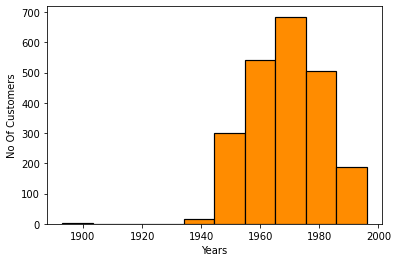

In [7]:
# plt.figure(figsize=[10,7])
plt.hist(df.Year_Birth, color="darkorange", edgecolor="black", linewidth=1.2)
plt.xlabel("Years")
plt.ylabel("No Of Customers")
plt.show()

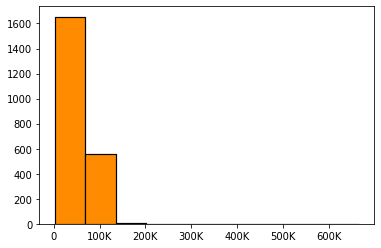

In [8]:
# plt.figure(figsize=[10, 7])
plt.hist(df.Income, color = "darkorange", edgecolor = "black", linewidth = 1.2)
plt.xticks([0, 100000, 200000, 300000, 400000, 500000, 600000], ["0", "100K", "200K", "300K", "400K", "500K", "600K"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


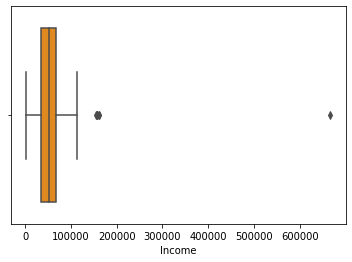


The Number Of Outliers Are  2208


In [9]:
# plt.figure(figsize=[10,7])
sns.boxplot(df.Income, color= "darkorange")
plt.show()
outliers = df.Income < 150000
outliers = outliers.sum()
print()
print("The Number Of Outliers Are ", outliers)


In [10]:
#we Have 24 NAN Values So We Would Fill Them Up With Mean Values But After
#Dropping Outliers Because Outliers Would Effect Our Mean Badly
query = df.Income<150000
dff = df[query]
mean_value = dff["Income"].mean()
dff.fillna(value=mean_value, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [11]:
Graduation, PhD, Masters, TwoN_Cycle, Basic = dff.Education.value_counts()

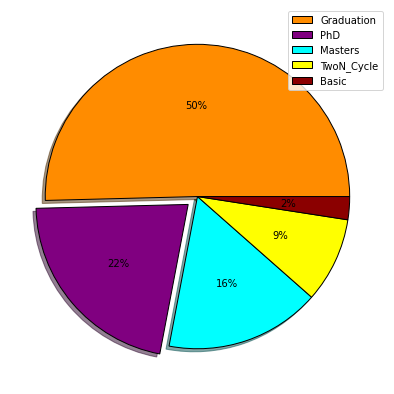

In [12]:
plt.figure(figsize=[10,7])
explode = [0.00, 0.08, 0.0, 0.0, 0.0]
plt.pie([Graduation, PhD, Masters, TwoN_Cycle, Basic], colors= ["darkorange", "purple", "cyan","yellow", "darkred"], shadow=True,
        explode=explode,autopct='%1.0f%%',
        wedgeprops =  {"edgecolor" : "black",'linewidth': 1,'antialiased': True})

plt.legend(["Graduation", "PhD", "Masters", "TwoN_Cycle", "Basic"])
plt.show()

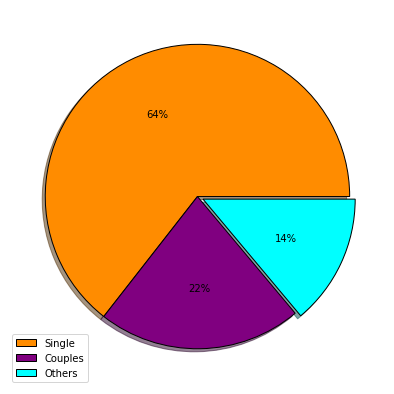

In [13]:
Married, Together, Single, Divorced, Widow, Alone, Absurd, YOLO = dff.Marital_Status.value_counts()

Couples = Married + Together
Single = Single + Alone + Absurd + YOLO
Others = Divorced + Widow

plt.figure(figsize=[10,7])

explode = [0.0, 0.00, 0.04]
plt.pie([Couples, Single, Others],colors= ["darkorange", "purple", "cyan"], shadow=True,
        explode=explode,autopct='%1.0f%%',
        wedgeprops =  {"edgecolor" : "black",'linewidth': 1,'antialiased': True}) 

plt.legend(["Single", "Couples", "Others"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


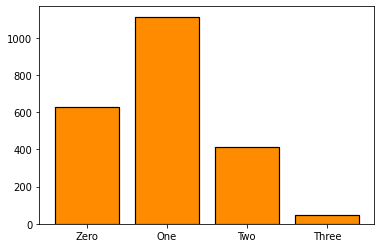

In [14]:
 dff["Total_kids"] = dff["Kidhome"] + dff["Teenhome"]
 one, zero, two, three = dff.Total_kids.value_counts()
 plt.bar(["Zero", "One", "Two", "Three"],[zero, one, two, three], color = "darkorange", edgecolor = "black", linewidth = 1.2)
 plt.xticks([0, 1, 2, 3])
 plt.show()

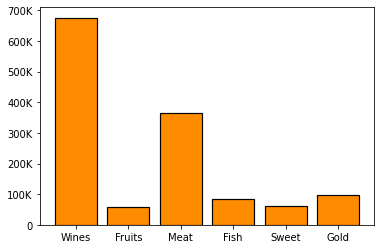

In [15]:
wines = dff.MntWines.sum()
fruits = dff.MntFruits.sum()
meat = dff.MntMeatProducts.sum()
fish = dff.MntFishProducts.sum()
sweet = dff.MntSweetProducts.sum()
gold = dff.MntGoldProds.sum()

names = ["Wines", "Fruits", "Meat", "Fish", "Sweet", "Gold"]
values = [wines, fruits, meat, fish, sweet, gold]
plt.bar(names, values, color="darkorange", edgecolor="black", linewidth = 1.2)
plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000, 700000],
           ["0", "100K", "200K", "300K", "400K", "500K", "600K", "700K"])
plt.show()

<BarContainer object of 3 artists>

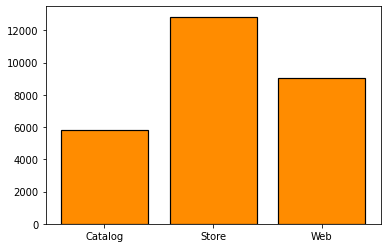

In [16]:
catalog = dff.NumCatalogPurchases.sum()
store = dff.NumStorePurchases.sum()
web = dff.NumWebPurchases.sum()

plt.bar(["Catalog", "Store", "Web"], [catalog, store, web], color="darkorange", edgecolor="black", linewidth=1.2)

<BarContainer object of 5 artists>

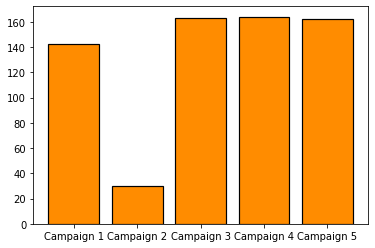

In [17]:
camp1 = dff.AcceptedCmp1.sum()
camp2 = dff.AcceptedCmp2.sum()
camp3 = dff.AcceptedCmp3.sum()
camp4 = dff.AcceptedCmp4.sum()
camp5 = dff.AcceptedCmp5.sum()
names = ["Campaign 1", "Campaign 2", "Campaign 3", "Campaign 4", "Campaign 5"]
value = [camp1, camp2, camp3, camp4, camp5]
plt.bar(names,value, color="darkorange" , edgecolor = "black", linewidth=1.2)

In [50]:
dff.reset_index(inplace=True)

one = ["Basic"]
two = ["Graduation", "2n Cycle"]
three = ["PhD", "Master"]
edu = []
for i in dff.Education:
  if i in one:
    edu.append(1)
  elif i in two:
    edu.append(2)
  elif i in three:
    edu.append(3)

Couple = ["Single", "Divorced", "Widow", "Alone", "Absurd", "YOLO"]
Singles = ["Together", "Married"]
marital = []
for i in dff.Marital_Status:
  if i in Couple:
    marital.append(2)
  elif i in Singles:
    marital.append(1)

dff["Marital"] = marital

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [51]:
data = pd.DataFrame()
data["Education"] = edu
data["Age"] = 2021 - dff["Year_Birth"]
data["Total_Members"] = dff["Kidhome"] + dff["Teenhome"] + dff["Marital"]
data["Income"] = dff["Income"]
data["Recency"] = dff["Recency"]
data["Consumption"] = (dff["MntWines"] + dff["MntFruits"] + dff["MntMeatProducts"] + dff["MntFishProducts"] + dff["MntSweetProducts"] + dff["MntGoldProds"])
data["Purchases"] = dff["NumWebPurchases"] + dff["NumCatalogPurchases"] + dff["NumStorePurchases"]
data["WebVisits"] = dff["NumWebVisitsMonth"]

In [52]:
scaler = StandardScaler()
standard_data = scaler.fit_transform(data.values)

1  :  17664.0
2  :  11987.53106377873
3  :  10669.652513444711
4  :  9755.840779784518
5  :  9159.163612033737
6  :  8615.620926349726
7  :  8208.371087753896
8  :  7790.795637591907
9  :  7435.956792460872



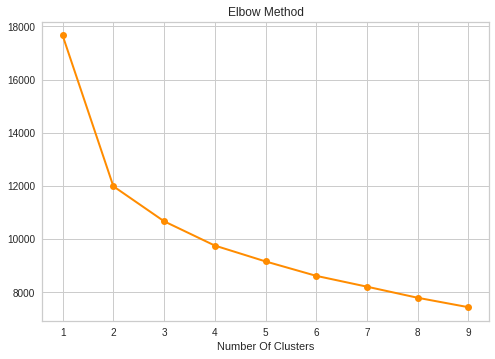


_____________________Silhoutte Score________________________
For n_clusters=2, the silhouette score is 0.2855068949497965
For n_clusters=3, the silhouette score is 0.19586452468448481
For n_clusters=4, the silhouette score is 0.17563257941685329
For n_clusters=5, the silhouette score is 0.15139913285170845
For n_clusters=6, the silhouette score is 0.15087093952056516
For n_clusters=7, the silhouette score is 0.16280383242205512
For n_clusters=8, the silhouette score is 0.15426777794871077


In [53]:
ssd = []
krange = range(1,10)
count = 1

for num_clusters in krange:
  kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
  kmeans.fit(standard_data)
  ssd.append(kmeans.inertia_)
  print(count, " : ", kmeans.inertia_)
  count += 1

print()
# plt.figure(figsize=[10, 7])
plt.plot(krange, ssd, color = "darkorange", linewidth = 2, marker = "o")
plt.title("Elbow Method")
plt.xlabel("Number Of Clusters")
plt.show()

print()
print("_____________________Silhoutte Score________________________")
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(standard_data)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(standard_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

In [74]:
kmean = KMeans(n_clusters= 2, max_iter=50)
kmean.fit(standard_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [75]:
kmean.labels_

array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

In [76]:
data["ClusterID"] = kmean.labels_

In [77]:
data.head()

,Education,Age,Total_Members,Income,Recency,Consumption,Purchases,WebVisits,ClusterID
0,2,64,2,58138.0,58,1617,22,7,1
1,2,67,4,46344.0,38,27,4,5,0
2,2,56,1,71613.0,26,776,20,4,1
3,2,37,2,26646.0,26,53,6,6,0
4,3,40,2,58293.0,94,422,14,5,0


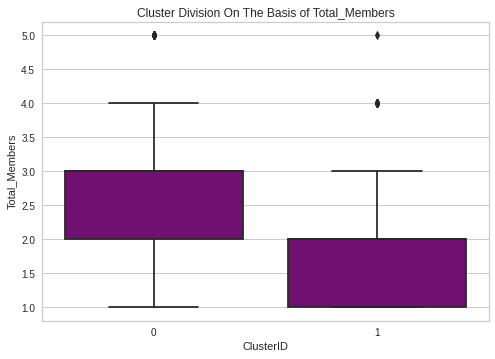

In [92]:
sns.boxplot(data=data, x="ClusterID", y="Total_Members", color="purple")
plt.title("Cluster Division On The Basis of Total_Members")
plt.show()

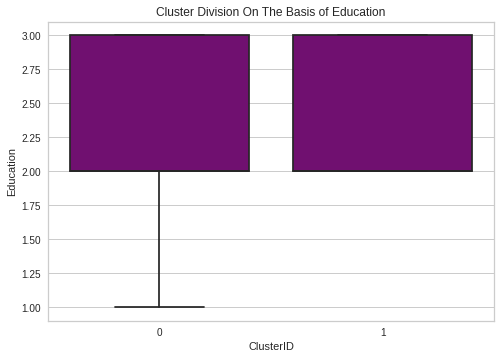

In [91]:
sns.boxplot(data=data, x="ClusterID", y="Education", color="purple")
plt.title("Cluster Division On The Basis of Education")
plt.show()

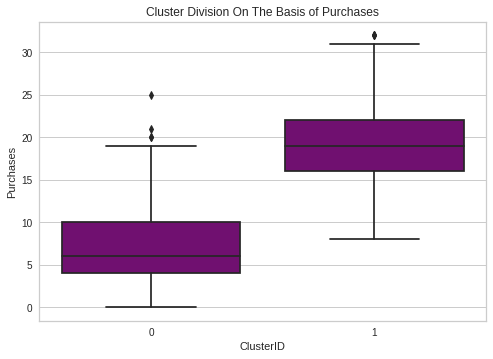

In [90]:
sns.boxplot(data=data, x="ClusterID", y="Purchases", color="purple")
plt.title("Cluster Division On The Basis of Purchases")
plt.show()

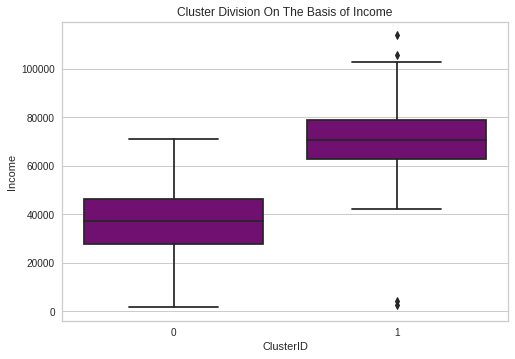

In [88]:
sns.boxplot(data=data, x="ClusterID", y="Income", color="purple")
plt.title("Cluster Division On The Basis of Income")
plt.show()

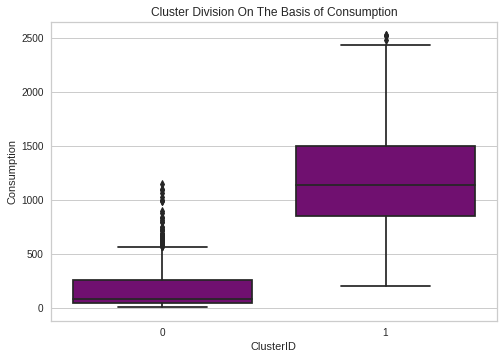

In [89]:
sns.boxplot(data=data, x="ClusterID", y="Consumption", color="purple")
plt.title("Cluster Division On The Basis of Consumption")
plt.show()


Conclusion

It seems Cluster 1 has taken out those Customers who have higher Family Members but their Income, Consumption, and Purchases are Less. On the other hand the Cluster 0 is doing eactly the Opposite. But in the Education Sector the values are too much distorted. Which shows that Education is not much Effecting the Data (Clusters Names May Change When ReRun)